# Программирование на языке Python
## Семинар 12. Pandas

In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv('zomato.csv', encoding='Windows-1251')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [18]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

#### Задача
Имея сырые данные, сгенерировать как можно большее количество полезных фичей для предсказания оценки ресторана.

**1. Исследуем таргет**

Таргет - 'Aggregate Rating'

In [ ]:
# Заметки
#1 значительное количество оценок 0 у ресторана

In [ ]:
# Действия
#1 - filter by "Rating text": remove 'Not rated'
#2 - скорректировать ли таргет на количество наблюдений?
#3 - убрать пропущенные значения по переменной Cuisines	

In [20]:
df['Country Code'].value_counts(dropna=False)

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

In [17]:
df['Aggregate rating'].describe().round(2)

count    9551.00
mean        2.67
std         1.52
min         0.00
25%         2.50
50%         3.20
75%         3.70
max         4.90
Name: Aggregate rating, dtype: float64

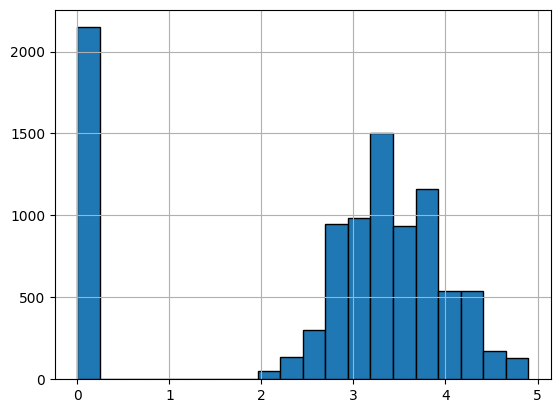

In [15]:
df['Aggregate rating'].hist(edgecolor='black', bins=20);

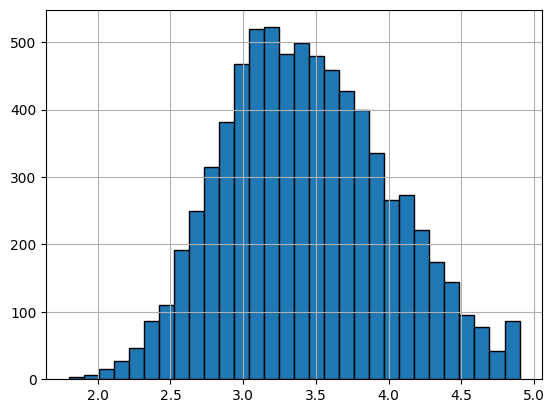

In [22]:
df.loc[df['Aggregate rating'] != 0, 'Aggregate rating'].hist(edgecolor='black', bins=30);

In [24]:
#1
df.loc[df['Aggregate rating'] == 0, :].shape

Restaurant ID         Restaurant Name  Country Code            City  \
30          6600060          Sandubas Cafн©            30       Brasн_lia   
58          7305048   Quiosque Chopp Brahma            30  Rio de Janeiro   
69          6710645        Cantinho da Gula            30      SнЈo Paulo   
77          6701419           Divino FogнЈo            30      SнЈo Paulo   
78          6703956             Super Grill            30      SнЈo Paulo   
...             ...                     ...           ...             ...   
9109       18277023           Bread & Pasta             1           Noida   
9110       18313203           Chillies Cafe             1           Noida   
9111       18254559                Platters             1           Noida   
9112       18255132               The Grand             1           Noida   
9351       18273002  Damascena Coffee House           215      Birmingham   

                                                Address  \
30    Edifн_cio Josн© Severo, SCS 6, Bloco A, Loja 9...   
58    Madureira Shopping - Loja 289/290, Piso 2, Est...   
69    Rua Pedroso Alvarenga, 522, Itaim Bibi, SнЈo P...   
77    Shopping MetrнЗ Santa Cruz - Piso L2, Rua Domi...   
78    Shopping Morumbi - Piso Lazer, Avenida Roque P...   
...                                                 ...   
9109  Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...   
9110                 G-11, Tulip Mall, Sector 48, Noida   
9111  Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...   
9112                  G-5, Tulip Mall, Sector 48, Noida   
9351             133 Alcester Road, Moseley, Birmingham   

                                      Locality  \
30                                     Asa Sul   
58                                   Madureira   
69                                  Itaim Bibi   
77    Shopping MetrнЗ Santa Cruz, Vila Mariana   
78               Shopping Morumbi, Santo Amaro   
...                                        ...   
9109              Tulip Mall, Sector 48, Noida   
9110              Tulip Mall, Sector 48, Noida   
9111              Tulip Mall, Sector 48, Noida   
9112              Tulip Mall, Sector 48, Noida   
9351                                   Moseley   

                                       Locality Verbose  Longitude   Latitude  \
30                                   Asa Sul, Brasн_lia -47.890167 -15.797000   
58                            Madureira, Rio de Janeiro -43.341164 -22.870413   
69                               Itaim Bibi, SнЈo Paulo -46.675667 -23.581000   
77    Shopping MetrнЗ Santa Cruz, Vila Mariana, SнЈo... -46.637167 -23.599500   
78            Shopping Morumbi, Santo Amaro, SнЈo Paulo -46.698574 -23.622925   
...                                                 ...        ...        ...   
9109                Tulip Mall, Sector 48, Noida, Noida  77.367303  28.557929   
9110                Tulip Mall, Sector 48, Noida, Noida  77.367188  28.557842   
9111                Tulip Mall, Sector 48, Noida, Noida  77.367322  28.557930   
9112                Tulip Mall, Sector 48, Noida, Noida  77.367188  28.557852   
9351                                Moseley, Birmingham  -1.888555  52.446302   

                                  Cuisines  Average Cost for two  \
30                         Brazilian, Cafe                    30   
58                     Bar Food, Brazilian                    70   
69                               Brazilian                    55   
77                      Brazilian, Mineira                    65   
78                               Brazilian                    50   
...                                    ...                   ...   
9109                             Fast Food                   400   
9110                             Fast Food                   600   
9111                 North Indian, Chinese                   500   
9112                  Raw Meats, Fast Food                   250   
9351  Greek, Mediterranean, Middle Eastern        

In [25]:
df.loc[df['Aggregate rating'] == 0, :].shape

(2148, 21)

In [28]:
(df.loc[df['Rating text'] == 'Not rated', 'Aggregate rating'] == 0).all()

True

**2. Исследуем фичи**

- Restaurant Name - может пригодится, особенно если подключить NLP (оставить только слова, убрать все лишние символы);
- Country Code - пригодится в качестве дамми-переменной (надо перевести страны в названия);
- Address - берем (тут нужно отдельное исследование)
- Longitude - берем без изменений
- Latitude - берем без изменений
- Cuisines - берем (тут нужно отдельное исследование)
- Average Cost for two - берем, но приводим к единой валюте
- Has Table booking:Switch to order menu
- Price range - берем

In [30]:
data = df[df['Rating text'] != 'Not rated'].reset_index(drop=True)

In [31]:
data.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

#### Cuisines

In [52]:
cuisines_nested = data['Cuisines'].dropna().str.split(', ').tolist()
cuisines = pd.Series([c for lst in cuisines_nested for c in lst])

cuisines_counts = cuisines.value_counts()

cuisines_to_remove = cuisines_counts.index[cuisines_counts.values < 50]

In [56]:
cuisines_counts[cuisines_counts.values >= 50]

North Indian     3017
Chinese          2184
Fast Food        1563
Mughlai           794
Italian           726
Continental       699
Cafe              634
Desserts          543
Bakery            536
South Indian      485
Street Food       403
American          380
Pizza             328
Mithai            251
Burger            239
Thai              229
Asian             228
Beverages         177
Mexican           174
Seafood           171
Ice Cream         169
European          146
Healthy Food      137
Japanese          134
Biryani           126
Mediterranean     110
Finger Food       106
Salad              91
Raw Meats          80
Sushi              75
Indian             66
Lebanese           65
Steak              62
Sandwich           53
Name: count, dtype: int64

In [53]:
cuisines_to_remove

Index(['Salad', 'Raw Meats', 'Sushi', 'Indian', 'Lebanese', 'Steak',
       'Sandwich', 'Breakfast', 'Bar Food', 'Tea',
       ...
       'Malwani', 'Persian', 'Armenian', 'Soul Food', 'Irish', 'Bubble Tea',
       'Canadian', 'Gourmet Fast Food', 'Peruvian', 'Bн_rek'],
      dtype='object', length=116)

In [43]:
data.shape

(7403, 21)

North Indian         3017
Chinese              2184
Fast Food            1563
Mughlai               794
Italian               726
                     ... 
Bubble Tea              1
Canadian                1
Gourmet Fast Food       1
Peruvian                1
Bн_rek                  1
Name: count, Length: 143, dtype: int64

In [45]:
import matplotlib.pyplot as plt